<a href="https://colab.research.google.com/github/tivonj/Credit_Line_Increase/blob/main/Credit_Line_Increase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import tree                             # sklearn tree model for decision trees
from sklearn.model_selection import train_test_split # for partitioning data
from sklearn.model_selection import cross_val_score  # for cross validation
from sklearn.metrics import roc_auc_score            # to asses decision tree perforamce

# to upload local files
import io
from google.colab import files             

import numpy as np                                   # array, vector, matrix calculations
import pandas as pd                                  # dataFrame handling

from matplotlib import pyplot as plt                 # plotting
import seaborn as sns                                # slightly better plotting  

SEED = 12345                                         # ALWAYS use a random seed for better reproducibility

In [2]:
# special google colab command to upload a file from your computer
uploaded = files.upload()

Saving credit_line_increase.csv to credit_line_increase.csv


In [3]:
type(uploaded) # what kind of Python object did we just create?

dict

In [4]:
uploaded.keys() # what is stored in that Python object?

dict_keys(['credit_line_increase.csv'])

In [5]:
# read uploaded data into a pandas dataframe
data = pd.read_csv(io.StringIO(uploaded['credit_line_increase.csv'].decode('utf-8')))

In [6]:
data.shape # (rows,columns)

(30000, 26)

In [7]:
data.columns # names of columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'RACE', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DELINQ_NEXT'],
      dtype='object')

In [8]:
data.isnull().any() # check for missing values

ID             False
LIMIT_BAL      False
SEX            False
RACE           False
EDUCATION      False
MARRIAGE       False
AGE            False
PAY_0          False
PAY_2          False
PAY_3          False
PAY_4          False
PAY_5          False
PAY_6          False
BILL_AMT1      False
BILL_AMT2      False
BILL_AMT3      False
BILL_AMT4      False
BILL_AMT5      False
BILL_AMT6      False
PAY_AMT1       False
PAY_AMT2       False
PAY_AMT3       False
PAY_AMT4       False
PAY_AMT5       False
PAY_AMT6       False
DELINQ_NEXT    False
dtype: bool

In [9]:
data.describe() # basic descriptive statistics

ID       LIMIT_BAL  ...       PAY_AMT6   DELINQ_NEXT
count  30000.000000    30000.000000  ...   30000.000000  30000.000000
mean   15000.500000   167484.322667  ...    5215.502567      0.221200
std     8660.398374   129747.661567  ...   17777.465775      0.415062
min        1.000000    10000.000000  ...       0.000000      0.000000
25%     7500.750000    50000.000000  ...     117.750000      0.000000
50%    15000.500000   140000.000000  ...    1500.000000      0.000000
75%    22500.250000   240000.000000  ...    4000.000000      0.000000
max    30000.000000  1000000.000000  ...  528666.000000      1.000000

[8 rows x 26 columns]

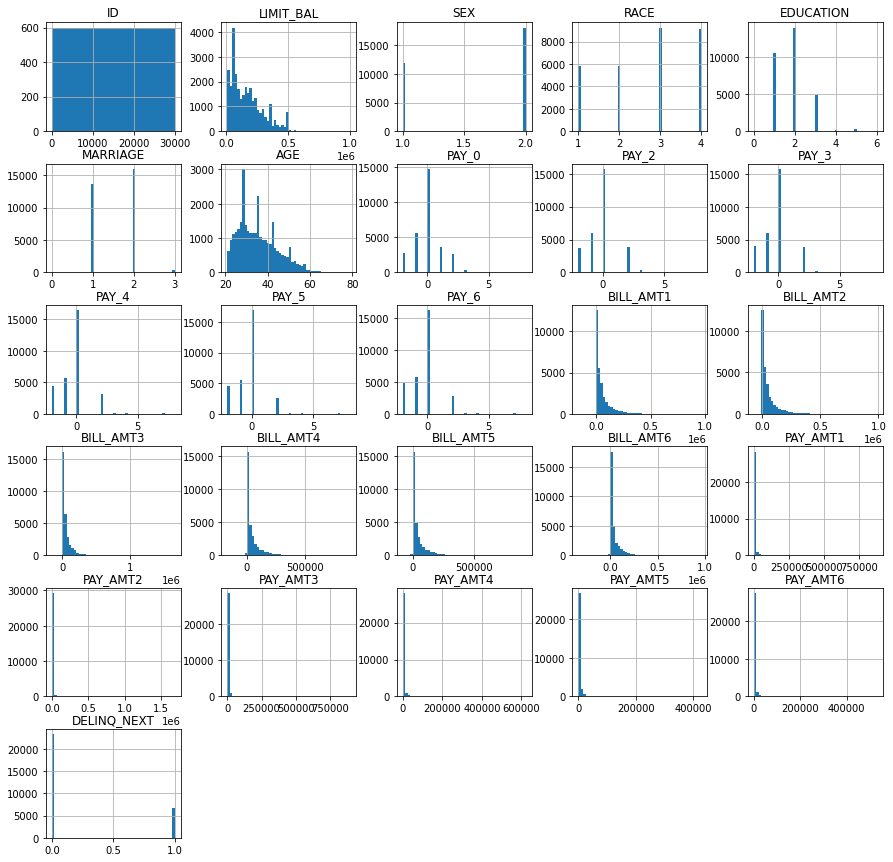

In [10]:
_ = data[data.columns].hist(bins=50, figsize=(15, 15)) # display histograms

In [11]:
# Pearson correlation matrix
corr = data.corr() 
corr

ID  LIMIT_BAL       SEX  ...  PAY_AMT5  PAY_AMT6  DELINQ_NEXT
ID           1.000000   0.026179  0.018497  ...  0.000652  0.003000    -0.013952
LIMIT_BAL    0.026179   1.000000  0.024755  ...  0.217202  0.219595    -0.153520
SEX          0.018497   0.024755  1.000000  ... -0.001667 -0.002766    -0.039961
RACE        -0.000710   0.044173  0.006149  ...  0.022148  0.020259    -0.303811
EDUCATION    0.039177  -0.219161  0.014232  ... -0.040358 -0.037200     0.028006
MARRIAGE    -0.029079  -0.108139 -0.031389  ... -0.001205 -0.006641    -0.024339
AGE          0.018678   0.144713 -0.090874  ...  0.022850  0.019478     0.013890
PAY_0       -0.030575  -0.271214 -0.057643  ... -0.058190 -0.058673     0.324794
PAY_2       -0.011215  -0.296382 -0.070771  ... -0.037093 -0.036500     0.263551
PAY_3       -0.018494  -0.286123 -0.066096  ... -0.035863 -0.035861     0.235253
PAY_4       -0.002735  -0.267460 -0.060173  ... -0.033590 -0.026565     0.216614
PAY_5       -0.022199  -0.249411 -0.055064  ... -0.033337 -0.023027     0.204149
PAY_6       -0.020270  -0.235195 -0.044008  ... -0.046434 -0.025299     0.186866
BILL_AMT1    0.019389   0.285430 -0.033642  ...  0.167026  0.179341    -0.019644
BILL_AMT2    0.017982   0.278314 -0.031183  ...  0.157957  0.174256    -0.014193
BILL_AMT3    0.024354   0.283236 -0.024563  ...  0.179712  0.182326    -0.014076
BILL_AMT4    0.040351   0.293988 -0.021880  ...  0.160433  0.177637    -0.010156
BILL_AMT5    0.016705   0.295562 -0.017005  ...  0.141574  0.164184    -0.006760
BILL_AMT6    0.016730   0.290389 -0.016733  ...  0.307729  0.115494    -0.005372
PAY_AMT1     0.009742   0.195236 -0.000242  ...  0.148459  0.185735    -0.072929
PAY_AMT2     0.008406   0.178408 -0.001391  ...  0.180908  0.157634    -0.058579
PAY_AMT3     0.039151   0.210167 -0.008597  ...  0.159214  0.162740    -0.056250
PAY_AMT4     0.007793   0.203242 -0.002229  ...  0.151830  0.157834    -0.056827
PAY_AMT5     0.000652   0.217202 -0.001667  ...  1.000000  0.154896    -0.055124
PAY_AMT6     0.003000   0.219595 -0.002766  ...  0.154896  1.000000    -0.053183
DELINQ_NEXT -0.013952  -0.153520 -0.039961  ... -0.055124 -0.053183     1.000000

[26 rows x 26 columns]

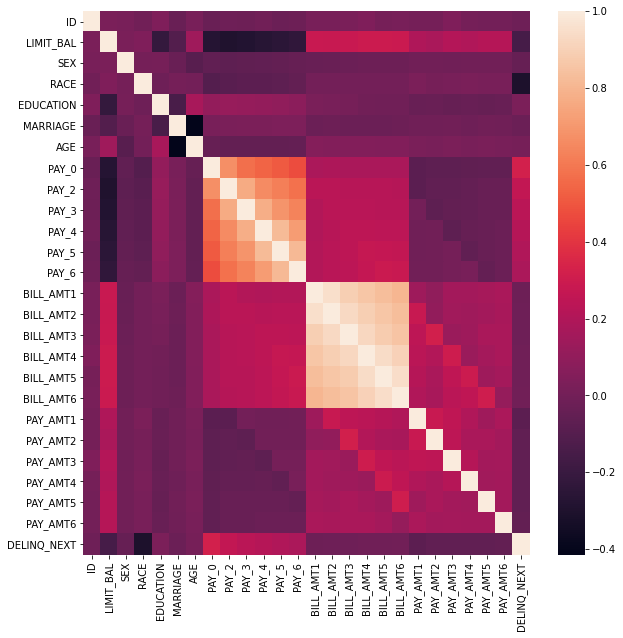

In [12]:
# correlation heatmap
plt.figure(figsize=(10, 10))
_ = sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

In [13]:
# assign basic modeling roles
# do not put demographic variables into a financial model!
y_name = 'DELINQ_NEXT'
X_names = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [14]:
# partition data for honest assessment
train_X, valid_test_X, train_y, valid_test_y = train_test_split(data[X_names], data[y_name], test_size=0.5, random_state=SEED) # split off training data
valid_X, test_X, valid_y, test_y = train_test_split(valid_test_X, valid_test_y, test_size=0.5, random_state=SEED) # split remainder into validation and test

# summarize 
print('Training data: %i rows and %i columns' % (train_X.shape[0], train_X.shape[1] + 1))
print('Validation data: %i rows and %i columns' % (valid_X.shape[0], valid_X.shape[1] + 1))
print('Testing data: %i rows and %i columns' % (test_X.shape[0], test_X.shape[1] + 1))

# housekeeping
del valid_test_X 
del valid_test_y

Training data: 15000 rows and 20 columns
Validation data: 7500 rows and 20 columns
Testing data: 7500 rows and 20 columns


In [15]:
# train decision tree with validation-based early stopping
max_depth = 12
candidate_models = {}

# cycle through tree depths to find best model in validation data
for depth in range(0, max_depth):

  # fit a model at max_depth=depth+1
  clf = tree.DecisionTreeClassifier(max_depth = depth + 1)
  clf.fit(train_X, train_y)

  # score training and validation data
  train_phat = clf.predict_proba(train_X)[:, 1]
  valid_phat = clf.predict_proba(valid_X)[:, 1]

  # calculate AUC to assess performance quality
  train_auc = roc_auc_score(train_y, train_phat)
  valid_auc = roc_auc_score(valid_y, valid_phat)

  # calculate cross validation scores to assess stability in validation data
  cv_scores = cross_val_score(clf, valid_X, valid_y, scoring = 'roc_auc', cv=5)
  cv_std = np.std(cv_scores)

  # store results to analyze and select best model later
  candidate_models[depth + 1] = {} # dictionary inside a dictionary
  candidate_models[depth + 1]['Model'] = clf
  candidate_models[depth + 1]['Training AUC'] = train_auc
  candidate_models[depth + 1]['Validation AUC'] = valid_auc
  candidate_models[depth + 1]['5-Fold SD'] = cv_std


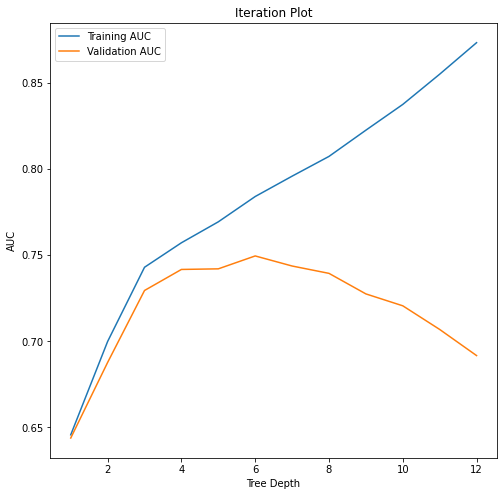

In [16]:
# plot tree depth vs. training and validation AUC using simple pandas plotting and matplotlib
candidate_results = pd.DataFrame.from_dict(candidate_models,  orient='index') # turn nested dictionary into a dataframe directly
fig, ax = plt.subplots(figsize=(8, 8))
_ = candidate_results[['Training AUC', 'Validation AUC']].plot(title='Iteration Plot', ax=ax) # links to axis initiated above
_ = ax.set_xlabel('Tree Depth') # x-axis label
_ = ax.set_ylabel('AUC') # y-axis label

In [17]:
# view same results as a table, using pandas iloc to remove first column of table
candidate_results.iloc[:, 1:]

Training AUC  Validation AUC  5-Fold SD
1       0.645748        0.643880   0.009275
2       0.699912        0.687752   0.012626
3       0.742968        0.729490   0.017375
4       0.757178        0.741696   0.016927
5       0.769331        0.742049   0.020314
6       0.784010        0.749533   0.016748
7       0.795819        0.743691   0.024052
8       0.807289        0.739423   0.014827
9       0.822498        0.727509   0.013238
10      0.837446        0.720604   0.006483
11      0.854989        0.706889   0.009777
12      0.873268        0.691724   0.011221

In [18]:
# plot the tree for human interpretation
best_model = candidate_models[6]['Model']
fig = plt.figure(figsize=(400, 70))
_ = tree.plot_tree(best_model,
                   feature_names=X_names,
                   class_names=['On time', 'Delinquent'],
                   filled=True)

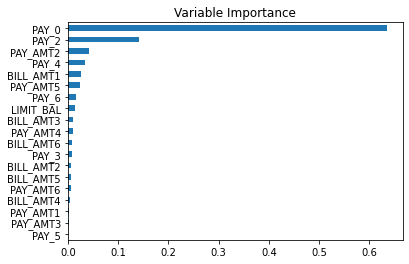

In [19]:
# plot variable importances

# create pandas dataframe
importances = pd.DataFrame(best_model.feature_importances_,
                           index=X_names,
                           columns=['Importance'])
# plot dataframe values
_ = importances.sort_values(by='Importance').plot(kind='barh', title = 'Variable Importance', legend = False)

In [20]:
# score on test data for 
# final HONEST assessment
# this is not to see how well the model *did*!
# it's to get an assessment of how it *will do* on unseen data!
test_phat = best_model.predict_proba(test_X)[:, 1] # get scores on test data
print('Test AUC: %.4f' % roc_auc_score(test_y, test_phat))

Test AUC: 0.7442


Function to create confusion matrices

In [34]:
# function for confusion matrices
def get_confusion_matrix(frame, y, yhat, by=None, level=None, cutoff=0.5, verbose=True):
  """ Creates confusion matrix from pandas dataframe of y and yhat values, can be sliced by a variable and level.

      :param frame: Pandas dataframe of actual (y) and predicted (yhat) values.
      :param y: Name of actual value column.
      :param yhat: Name of predicted value column.
      :param by: By variable to slice frame before creating confusion matrix, default None.
      :param cutoff: Cutoff threshold for confusion matrix, default 0.5.
      :param verbose: Whether to print confusion matrix titles, default True.
      :return: Confusion matrix as pandas dataframe.

  """
  # determine levels of target (y) variable
  # sort for consistency
  level_list = list(frame[y].unique())
  level_list.sort(reverse=True)

  # init confusion matrix
  cm_frame = pd.DataFrame(columns=['actual: ' + str(i) for i in level_list],
                          index=['predicted: ' + str(i) for i in level_list])
  
  # don't destroy original data
  frame_ = frame.copy(deep=True)

  # convert numeric predictions to binary decisions using cutoff
  dname = 'd_' + str(y)
  frame_[dname] = np.where(frame_[yhat] > cutoff, 1, 0)

  # slice frame
  if (by is not None) & (level is not None):
    frame_ = frame_[frame[by] == level]

  # calculate size of each confusion matrix value
  for i, lev_i in enumerate(level_list):
    for j, lev_j in enumerate(level_list):
      cm_frame.iat[j, i] = frame_[(frame_[y] == lev_i) & (frame_[dname] == lev_j)].shape[0]
      # i, j vs. j, i nasty little bug ... updated 8/30/19

  # output results
  if verbose:
    if by is None:
      print('Confusion matrix:')
    else:
      print('confusion matrix by ' + by + '=' + str(level))
  return cm_frame

Function to calculate AIR

In [38]:
# function for AIR
def air(cm_dict, reference_key, protected_key, verbose=True):

  """ Calculates the adverse impact ratio as a quotient between protected and reference group acceptance rates: protected_prop/reference_prop.
      Optionally prints intermediate values. ASSUMES 0 IS "POSITIVE" OUTCOME!

      :param cm_dict: Dictionary of demographic group confusion matrices.
      :param reference_key: Name of refernce group in cm_dict as a string.
      :param protected_key: Name of protected group in cm_dict as a string.
      :param verbose: Whether to print intermediate acceptance rates, default True.
      :return: AIR.

  """
  
  eps = 1e-20 # numeric stability and divide by 0 protection

  # reference group summary
  reference_accepted = float(cm_dict[reference_key].iat[1,0] + cm_dict[reference_key].iat[1,1]) # predicted 0's
  reference_total = float(cm_dict[reference_key].sum().sum())
  reference_prop = reference_accepted/reference_total
  if verbose:
    print(reference_key.title() + ' proportion accepted: %.3f' % reference_prop)

  # protected group summary
  protected_accepted = float(cm_dict[protected_key].iat[1,0] + cm_dict[protected_key].iat[1,1]) # predicted 0's
  protected_total = float(cm_dict[protected_key].sum().sum())
  protected_prop = protected_accepted/protected_total
  if verbose:
    print(protected_key.title() + ' proportion accepted: %.3f' % protected_prop)

  # return adverse impact ratio
  return ((protected_prop + eps)/(reference_prop + eps))

Bias testing

In [36]:
# add predictions onto validation set
# note we need a probability cutoff to make a final decision
valid_yhat = pd.DataFrame(valid_X, columns=X_names)
valid_yhat['RACE'] = data.loc[valid_yhat.index, 'RACE']
valid_yhat['SEX'] = data.loc[valid_yhat.index, 'SEX']
valid_yhat[y_name] = valid_y
valid_yhat['phat'] = best_model.predict_proba(valid_X)[:, 1]
valid_yhat.head()

LIMIT_BAL  PAY_0  PAY_2  PAY_3  ...  RACE  SEX  DELINQ_NEXT      phat
10752     470000      0      0      0  ...   3.0    1            0  0.070193
24174     260000     -1      0      0  ...   1.0    1            0  0.070193
13524      80000      0      0      0  ...   3.0    2            0  0.119735
13049      50000      1      2      0  ...   3.0    2            1  0.372789
23427     200000      1      2      0  ...   3.0    2            0  0.372789

[5 rows x 23 columns]

In [39]:
# calculate confusion matrices across race groups
race_dict = {'hispanic': 1,
             'black': 2,
             'white': 3,
             'asian': 4}

race_group_names = list(race_dict.keys())
race_cm_dict = {}

# calculate confusion matrices at standard cutoff 0.15
for name in race_group_names:
  race_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='RACE', level=race_dict[name], cutoff = 0.15)
  print(race_cm_dict[name])
  print('(%s)' % name.title())
  print()

# calculate AIR
for name in race_group_names:
  if name != 'white':
    print('%s-to-%s AIR: %.2f' % (name, 'white', air(race_cm_dict, 'white', name)))
    print()

confusion matrix by RACE=1
             actual: 1 actual: 0
predicted: 1       448       387
predicted: 0       138       501
(Hispanic)

confusion matrix by RACE=2
             actual: 1 actual: 0
predicted: 1       449       352
predicted: 0       157       533
(Black)

confusion matrix by RACE=3
             actual: 1 actual: 0
predicted: 1       177       813
predicted: 0        71      1228
(White)

confusion matrix by RACE=4
             actual: 1 actual: 0
predicted: 1       186       785
predicted: 0        59      1216
(Asian)

White proportion accepted: 0.567
Hispanic proportion accepted: 0.434
hispanic-to-white AIR: 0.76

White proportion accepted: 0.567
Black proportion accepted: 0.463
black-to-white AIR: 0.82

White proportion accepted: 0.567
Asian proportion accepted: 0.568
asian-to-white AIR: 1.00



In [ ]:
# calculate confusion matrices across sex groups
# calculate confusion matrices at standard cutoff 0.15
# calculate AIR

Bias remediation

In [ ]:
# function to calculate accuracy at a certain probability

In [ ]:
# observe accuracy trend as cutoff increases
# the problem is: higher cutoff means lending more money, even if more accurate

In [ ]:
# recalculate AIR and confusion matrices at different cutoff
# recalculate race confusion matrices at different cutoff

In [ ]:
# redo model search with new information
# train decision tree with validation-based early stopping and AIR calculation

In [ ]:
# plot tree depth vs training and validation AUC and AIR using simple pandas plotting and matplotlib